## Dealing with imbalanced dataset 

In [32]:
import pickle 
import pandas as pd
import matplotlib.pyplot as plt
import imblearn

In [33]:
with open("../data/my_pickled_data.pkl","rb") as file:
    data_list=pickle.load(file)

X_train_2label=data_list[0]
y_train_2label=data_list[1]
X_test_2label=data_list[2]
y_test_2label=data_list[3]

training = pd.concat([X_train_2label, y_train_2label], axis = 1)

Good: 28576
Bad: 669


<BarContainer object of 2 artists>

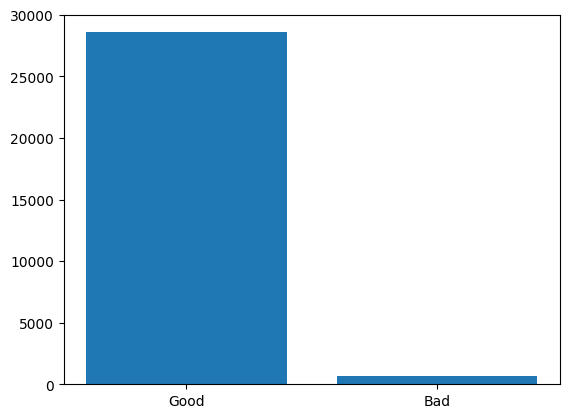

In [34]:
training_bad = training[training['Credit_Status'] == 'Bad']
training_good = training[training['Credit_Status'] == 'Good']
class_good = len(training_good)
class_bad = len(training_bad)
status_count = [class_good, class_bad]
print('Good:', class_good)
print('Bad:', class_bad)

plt.bar(['Good', 'Bad'], status_count)

In [ ]:
## Random Undersampling 

Random under-sampling:
Good    669
Bad     669
Name: Credit_Status, dtype: int64


<Axes: title={'center': 'Credit Status'}>

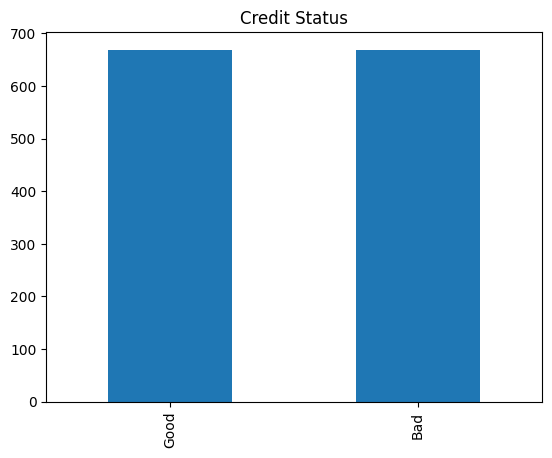

In [35]:
training_bad = training[training['Credit_Status'] == 'Bad']
training_good = training[training['Credit_Status'] == 'Good']

training_good_undersampling = training_good.sample(class_bad)
training_undersampled = pd.concat([training_good_undersampling, training_bad], axis = 0)

print('Random under-sampling:')
print(training_undersampled.Credit_Status.value_counts())
training_undersampled.Credit_Status.value_counts().plot(kind = 'bar', title = 'Credit Status')

In [36]:
X_train_undersampled = training_undersampled.iloc[:, :-1]
Y_train_undersampled = training_undersampled.iloc[:, -1]

X_train_undersampled.to_csv('../data/X_train_undersampling.csv', encoding = 'utf-8-sig')
Y_train_undersampled.to_csv('../data/y_train_undersampling.csv', encoding = 'utf-8-sig')

## Random Oversampling 

Random over-sampling:
Bad     28576
Good    28576
Name: Credit_Status, dtype: int64


<Axes: title={'center': 'Credit Status'}>

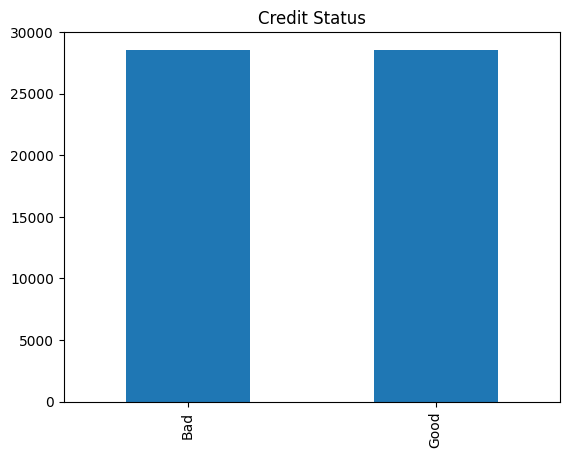

In [39]:
training_bad = training[training['Credit_Status'] == 'Bad']
training_good = training[training['Credit_Status'] == 'Good']

training_bad_oversampling = training_bad.sample(class_good, replace = True)
training_oversampled = pd.concat([training_bad_oversampling, training_good], axis = 0)

print('Random over-sampling:')
print(training_oversampled.Credit_Status.value_counts())
training_oversampled.Credit_Status.value_counts().plot(kind = 'bar', title = 'Credit Status')

In [40]:
X_train_oversampled = training_oversampled.iloc[:, :-1]
Y_train_oversampled = training_oversampled.iloc[:, -1]

X_train_oversampled.to_csv('../data/X_train_oversampling.csv', encoding = 'utf-8-sig')
Y_train_oversampled.to_csv('../data/y_train_oversampling.csv', encoding = 'utf-8-sig')

## SMOTE 

In [47]:
from imblearn.over_sampling import SMOTE 

smote = SMOTE()
X_sm, y_sm = smote.fit_resample(X_train_2label, y_train_2label)

print(y_sm.value_counts())

Good    28576
Bad     28576
Name: Credit_Status, dtype: int64


In [48]:
X_sm.to_csv('../data/X_train_smote.csv', encoding = 'utf-8-sig')
y_sm.to_csv('../data/y_train_smote.csv', encoding = 'utf-8-sig')